In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## Half Synchronization Test

### 1) Complete Graph

In [3]:
nxg = nx.complete_graph(10)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))
natfreqs

array([5.28669013, 5.28669013, 5.28669013, 5.28669013, 5.28669013,
       5.28669013, 5.28669013, 5.28669013, 5.28669013, 5.28669013])

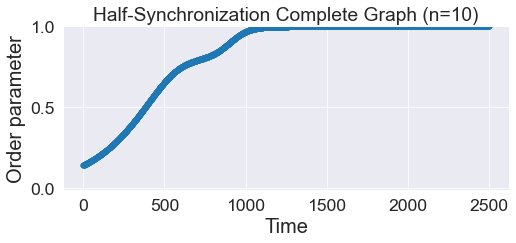

In [4]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.75, dt=0.01, T=25, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Complete Graph (n=10)');

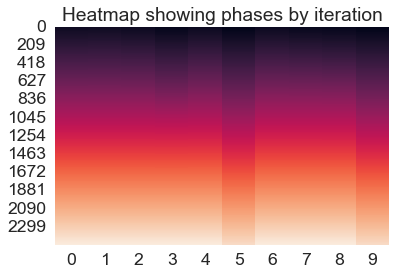

In [5]:
plot_heatmap(sim);

In [6]:
Kuramoto.concentrated

True

### 2)  [Karate Club Graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

In [7]:
nxg = nx.karate_club_graph()
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))

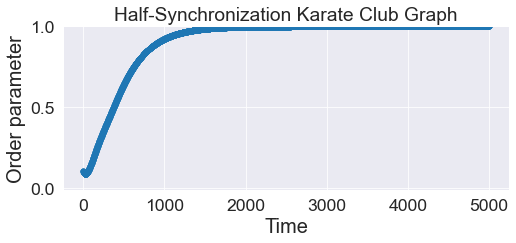

In [8]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.5, dt=0.01, T=50, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Karate Club Graph');

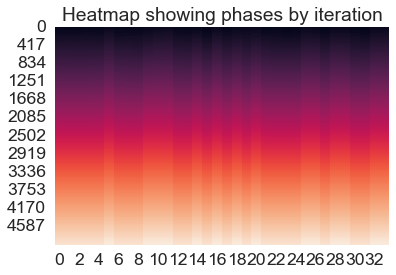

In [9]:
plot_heatmap(sim);

In [10]:
Kuramoto.concentrated

True

### 3) Uniformly Random Tree

In [11]:
tree = nx.random_tree(n=25)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(tree.nodes()))
print(nx.forest_str(tree, sources=[0]))

╙── 0
    └── 3
        └── 18
            ├── 2
            │   └── 16
            │       └── 5
            │           └── 1
            │               └── 22
            │                   └── 13
            └── 14
                └── 8
                    ├── 9
                    │   └── 10
                    ├── 4
                    │   └── 23
                    └── 6
                        ├── 17
                        │   ├── 11
                        │   └── 7
                        │       └── 19
                        └── 20
                            └── 24
                                └── 21
                                    └── 12
                                        └── 15


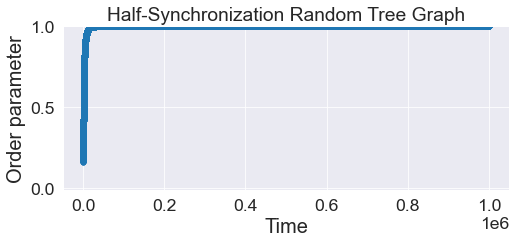

In [12]:
adj_mat = nx.to_numpy_array(tree)
model = Kuramoto(coupling=0.5, dt=0.01, T=10000, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Random Tree Graph');

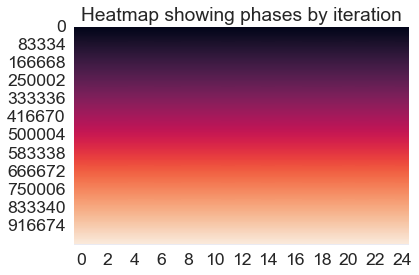

In [13]:
plot_heatmap(sim);

In [14]:
Kuramoto.concentrated

True